## EigenPulse Detecting Surges in Large Streaming Graphs with Row Augmentation
EigenPulse is a streaming algorithm to detect surges of sliding windows in real time.
### Abstract
How can we spot dense blocks in a large streaming graph efficiently? Anomalies such as fraudulent attacks, spamming, and DDoS attacks, can create dense blocks in a short time window, emerging a surge of density in a streaming graph. However, most existing methods detect dense blocks in a static graph or a snapshot of dynamic graphs, which need to inefficiently rerun the algorithms for a streaming graph. Moreover, some works on streaming graphs are either consuming much time on updating algorithm for every incoming edge, or spotting the whole snapshot of a graph instead of the attacking sub-block. Therefore, we propose a row-augmented matrix with sliding window to model a streaming graph, and design the AugSVD algorithm for computation- and memory-efficient singular decomposition. EigenP ulse is then proposed to spot the density surges in streaming graphs based on the singular spectrum. We theoretically analyze the robustness of our method. Experiments on real datasets with injections show our perfor- mance and efficiency compared with the state-of-the-art baseline.

In [12]:
import spartan as st

In [13]:
import gzip
f = gzip.open("./inputData/test_beer.tensor.gz")

### Function loadTensorStream():
tensor_data.data has multiple-colum attributes, and a single-colum values (optional). The following table shows an example of 10000 three-tuple (user, object, time) and the 4th-colum is the frequency. 

**f:**: file iterator of input file

In [14]:
tensor_stream = st.TensorStream(f, col_idx = [0,1,2,3], col_types=[int,int,int,int], sep=',', mappers={},hasvalue=True)

### Class TensorStream
**Input**

**f**: file iterator of input file

**col_idx**: list of the columns to process

**col_types**: list of data types of the columns to process

**sep**: the delimeter of input file

**mappers**: dict of idx-mapper dict, we have defined various mappers. 

StringMapper: mapping the names or complex string ids of users and objects into indices. 

ScoreMapper: mapping score (int or float) into index (int).

TimeMapper: mapping the time(string) with some formats into timestamps (int).

**hasvalue**: Whether "tensor_data.data" contains a single-colum values (optional) or not.

**Return**

an instance of TensorStream class.

### Run EigenPulse as a single model

In [15]:
param_dict={'window':20, 'stride':10, 'l':20, 'b':10,'item_idx':1,'ts_idx':2}
eigenpulse = st.EigenPulse(tensor_stream, **param_dict)

### the parameters of EigenPulse model

**window**: the window size of sliding window in a time unit

**stride**: the stride size in a time unit.

**l and b**: hyper-parameters of Algorithm 1.

**item_idx**: the column index of item attribute. 

**ts_idx**: the column index of time attribute.

EigenPulse first concentrates items by the time as row, user as column, and thus the row of modified tensor grows with the forward of time. We model the streaming tuples as row-augmented matrix in this way.

In [16]:
res, densities = eigenpulse.run()

density of dense submatrix in window 0 is 15.09
density of dense submatrix in window 1 is 5.93
density of dense submatrix in window 2 is 15.3
density of dense submatrix in window 3 is 6.03
density of dense submatrix in window 4 is 8.32
density of dense submatrix in window 5 is 9.17
density of dense submatrix in window 6 is 8.12
density of dense submatrix in window 7 is 10.42
density of dense submatrix in window 8 is 9.04
density of dense submatrix in window 9 is 6.38
density of dense submatrix in window 10 is 8.81
density of dense submatrix in window 11 is 8.92
density of dense submatrix in window 12 is 5.24
density of dense submatrix in window 13 is 10.03
density of each window: [15.09, 5.93, 15.3, 6.03, 8.32, 9.17, 8.12, 10.42, 9.04, 6.38, 8.81, 8.92, 5.24, 10.03]
mean:9.057142857142855, std val:3.0428641077152916, thres:18.18573518028873
suspicious windows: []


**res**: suspicious blocks whose densities are above the threshold. For each block, the results are the index of window, the lists of suspicious users, objects and times, and the density of block.

**densities**: list of the density of all windows

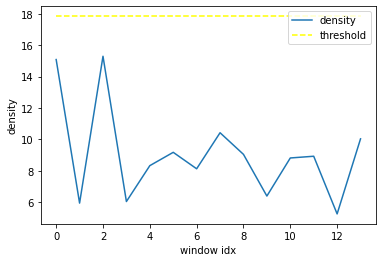

In [17]:
st.drawEigenPulse(densities, figpath='images/eigenDensities.png')

**figpath**: output path of the plot drawing the densities of all windows and the density threshold ($\mu+3\sigma$).

The plot is like this:
    <img src="images/eigenDensities.png" width="500"/> 

### Run EigenPulse from anomaly detection task

In [21]:
f = gzip.open("./inputData/test_beer.tensor.gz")
tensor_stream = st.TensorStream(f, col_idx = [0,1,2,3], col_types=[int,int,int,int], sep=',', mappers={},hasvalue=True)

In [22]:
ad_model = st.AnomalyDetection.create(tensor_stream, st.ADPolicy.EigenPulse, 'eigenpulse',**param_dict)

In [23]:
res, densities = ad_model.run()

density of dense submatrix in window 0 is 6.36
density of dense submatrix in window 1 is 8.93
density of dense submatrix in window 2 is 10.36
density of dense submatrix in window 3 is 8.53
density of dense submatrix in window 4 is 8.16
density of dense submatrix in window 5 is 6.48
density of dense submatrix in window 6 is 8.02
density of dense submatrix in window 7 is 6.59
density of dense submatrix in window 8 is 11.8
density of dense submatrix in window 9 is 8.84
density of dense submatrix in window 10 is 4.74
density of dense submatrix in window 11 is 6.28
density of dense submatrix in window 12 is 8.2
density of dense submatrix in window 13 is 7.34
density of each window: [6.36, 8.93, 10.36, 8.53, 8.16, 6.48, 8.02, 6.59, 11.8, 8.84, 4.74, 6.28, 8.2, 7.34]
mean:7.902142857142858, std val:1.8145276078253643, thres:13.345725680618951
suspicious windows: []


### Experimental results:
-----
EigenPulse (performance)       |  EigenPulse (inject attacks)
:-------------------------:|:-------------------------:
<img src="images/eigen_performance.png" width="300"/>  |   <img src="images/eigeninject.png" width="300"/>
<b>EigenPulse detection on real Sina Weibo data |  <b>EigenPulse is near linear
<img src="images/eigenweibo.png" width="300"/> |   <img src="images/eigenlinear.png" width="300"/>


### Cite:
Zhang J, Liu S, Yu W, et al. Eigenpulse: Detecting surges in large streaming graphs with row augmentation[C]//Pacific-Asia Conference on Knowledge Discovery and Data Mining. Springer, Cham, 2019: 501-513.

<details>
    <summary><span style="color:blue">click for BibTex...</span></summary>

```bibtex
@inproceedings{zhang2019eigenpulse,
      title={Eigenpulse: Detecting surges in large streaming graphs with row augmentation},
      author={Zhang, Jiabao and Liu, Shenghua and Yu, Wenjian and Feng, Wenjie and Cheng, Xueqi},
      booktitle={Pacific-Asia Conference on Knowledge Discovery and Data Mining},
      pages={501--513},
      year={2019},
      organization={Springer}
    }
 ```
</details>  